# Importação das bibliotecas principais

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

Carregando o dataset

In [24]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Análise Exploratória dos Dados 

Informações básicas do dataset

In [26]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

Distribuição das classes

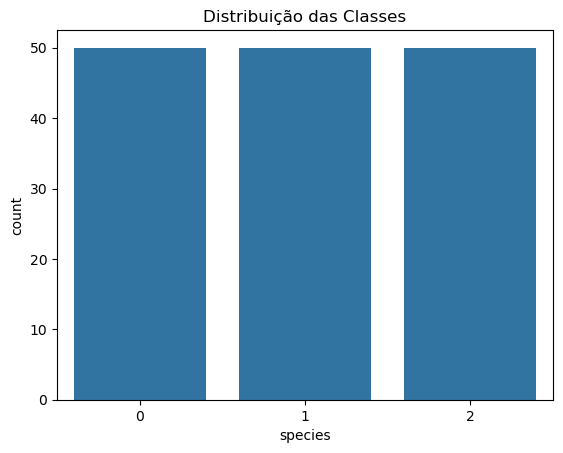

In [27]:
sns.countplot(x='species', data=df)
plt.title('Distribuição das Classes')
plt.show()

Correlação entre as variáveis

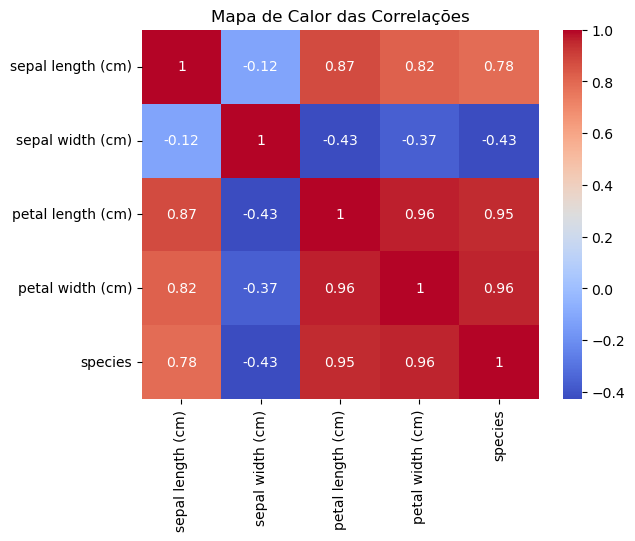

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()

# Visualização das Características

Pares de características com as classes

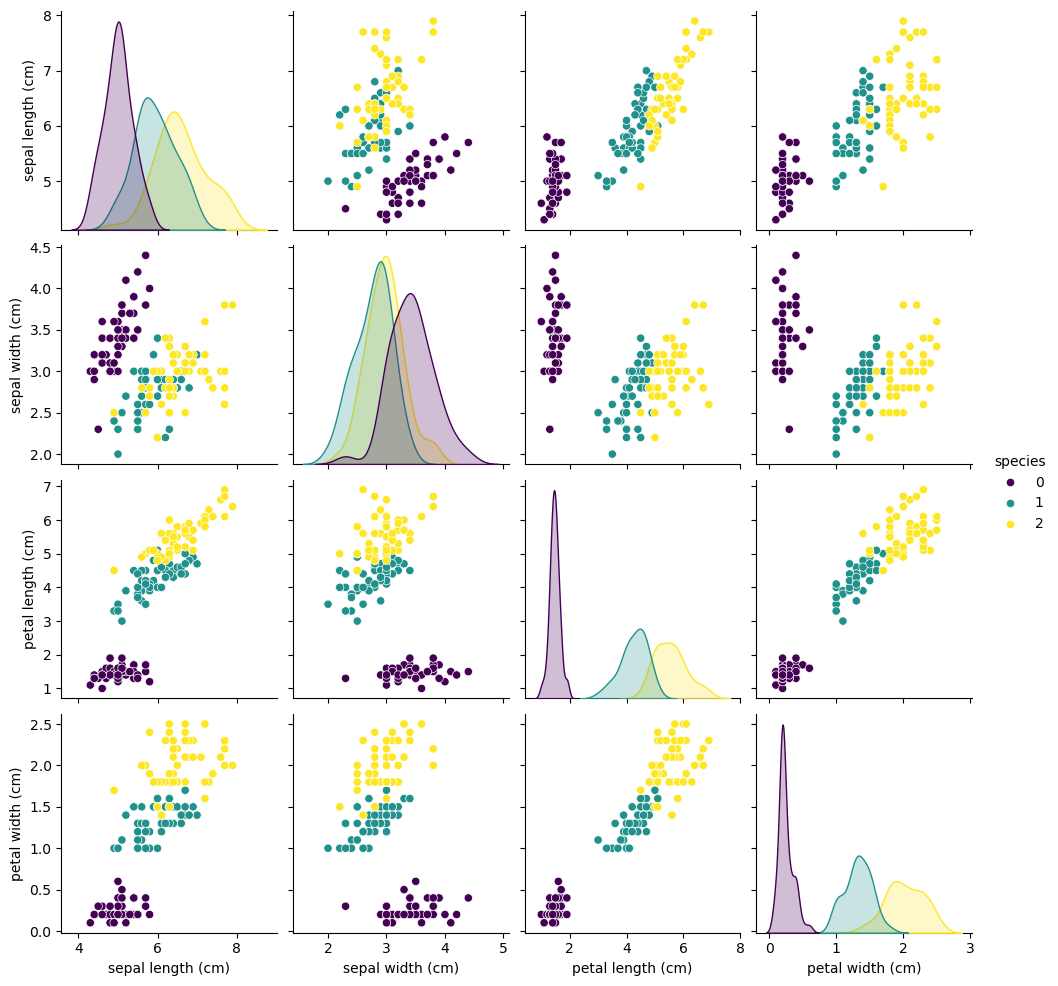

In [29]:
sns.pairplot(df, hue='species', palette='viridis')
plt.show()

# Pré-processamento dos Dados

Divisão em variáveis de entrada e saída

In [30]:
X = df.iloc[:, :-1]
y = df['species']

Divisão em conjunto de treino e teste

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação do Modelo: Random Forest

Treinamento com Random Forest

In [32]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Previsões e avaliação

In [33]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest - Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Criação do Modelo: Regressão Logística

Treinamento com Regressão Logística


In [34]:
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

Previsões e avaliação

In [36]:
y_pred_lr = lr_model.predict(X_test)
print("Regressão Logística - Acurácia:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regressão Logística - Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Avaliação Comparativa dos Modelos

In [37]:
print("Random Forest - Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Regressão Logística - Acurácia:", accuracy_score(y_test, y_pred_lr))

Random Forest - Acurácia: 1.0
Regressão Logística - Acurácia: 1.0


# Gráficos de Importância das Características para Random Forest

Visualizando a importância das características no Random Forest

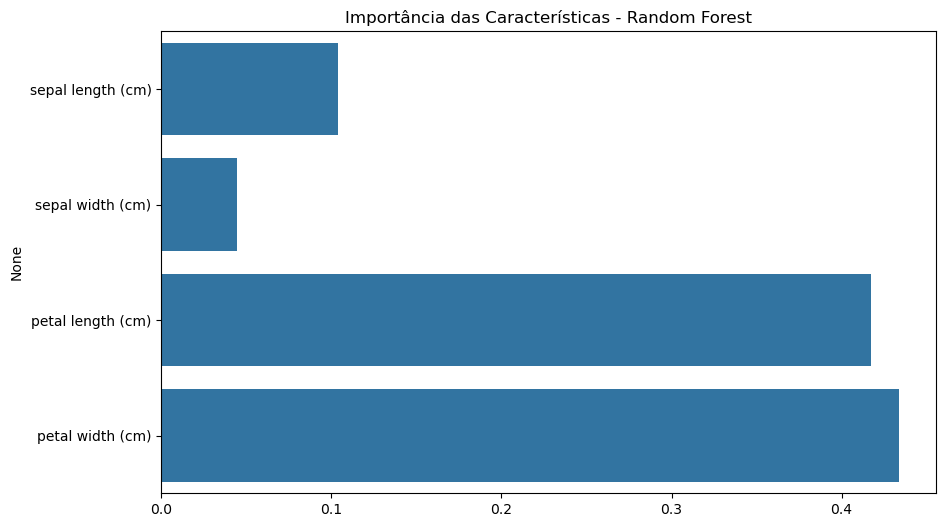

In [38]:
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Importância das Características - Random Forest')
plt.show()

Acurácia e Relatório de Classificação para Random Forest

In [41]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest - Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest - Acurácia: 1.0
Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Random Forest - Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Acurácia e Relatório de Classificação para Regressão Logística

In [43]:
y_pred_lr = lr_model.predict(X_test)
print("Regressão Logística - Acurácia:", accuracy_score(y_test, y_pred_lr))
print("Regressão Logística - Relatório de Classificação:")
print(classification_report(y_test, y_pred_lr))
print("Regressão Logística - Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_lr))

Regressão Logística - Acurácia: 1.0
Regressão Logística - Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Regressão Logística - Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
